**<h5><font color = 'red'>Copy right@2024</font></h5>**


## Loan Prdection

In [ ]:
from tabulate import tabulate
member_name = [

    ["HENG SEAKLONG", "Male", "Y3-AMS", "e20210329"],
    ["KHOEM Lyhourt", "Male", "Y3-AMS", "e20211040"],
    ["Dok Dominique", "Female", "Y3-AMS", "e20210337"],
    ["Chan Sophara", "Male", "Y3-AMS", "e20211081"],
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 6:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

Group 6:
╒═══════════════╤══════════╤═══════════╤═══════════╕
│ Name          │ Gender   │ Program   │ ID        │
╞═══════════════╪══════════╪═══════════╪═══════════╡
│ HENG SEAKLONG │ Male     │ Y3-AMS    │ e20210329 │
├───────────────┼──────────┼───────────┼───────────┤
│ KHOEM Lyhourt │ Male     │ Y3-AMS    │ e20211040 │
├───────────────┼──────────┼───────────┼───────────┤
│ Dok Dominique │ Female   │ Y3-AMS    │ e20210337 │
├───────────────┼──────────┼───────────┼───────────┤
│ Chan Sophara  │ Male     │ Y3-AMS    │ e20211081 │
╘═══════════════╧══════════╧═══════════╧═══════════╛


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from tabulate import tabulate

In [ ]:

df_train = pd.read_csv('loan-train.csv')
print(tabulate(df_train.head() , headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════╤══════════╤═══════════╤══════════════╤══════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╕
│    │ Loan_ID   │ Gender   │ Married   │   Dependents │ Education    │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪══════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╡
│  0 │ LP001002  │ Male     │ No        │            0 │ Graduate     │ No              │              5849 │                   0 │          nan │                360 │                1 │ Urban           │ Y             │
├────┼───────────┼──────────┼───────────┼──────────────┼──────────────┼─────────────────┼───────────────────┼───────

In [ ]:
df_train.drop(columns=['Loan_ID'], inplace=True)

In [ ]:
df_train.shape

(614, 12)

### Explore Data Analysis (EDA)

In [ ]:
print(tabulate(df_train.describe() , headers='keys', tablefmt="fancy_grid"))

╒═══════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╕
│       │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │
╞═══════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╡
│ count │            614    │              614    │     592      │           600      │       564        │
├───────┼───────────────────┼─────────────────────┼──────────────┼────────────────────┼──────────────────┤
│ mean  │           5403.46 │             1621.25 │     146.412  │           342      │         0.842199 │
├───────┼───────────────────┼─────────────────────┼──────────────┼────────────────────┼──────────────────┤
│ std   │           6109.04 │             2926.25 │      85.5873 │            65.1204 │         0.364878 │
├───────┼───────────────────┼─────────────────────┼──────────────┼────────────────────┼──────────────────┤
│ min   │            150    │        

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


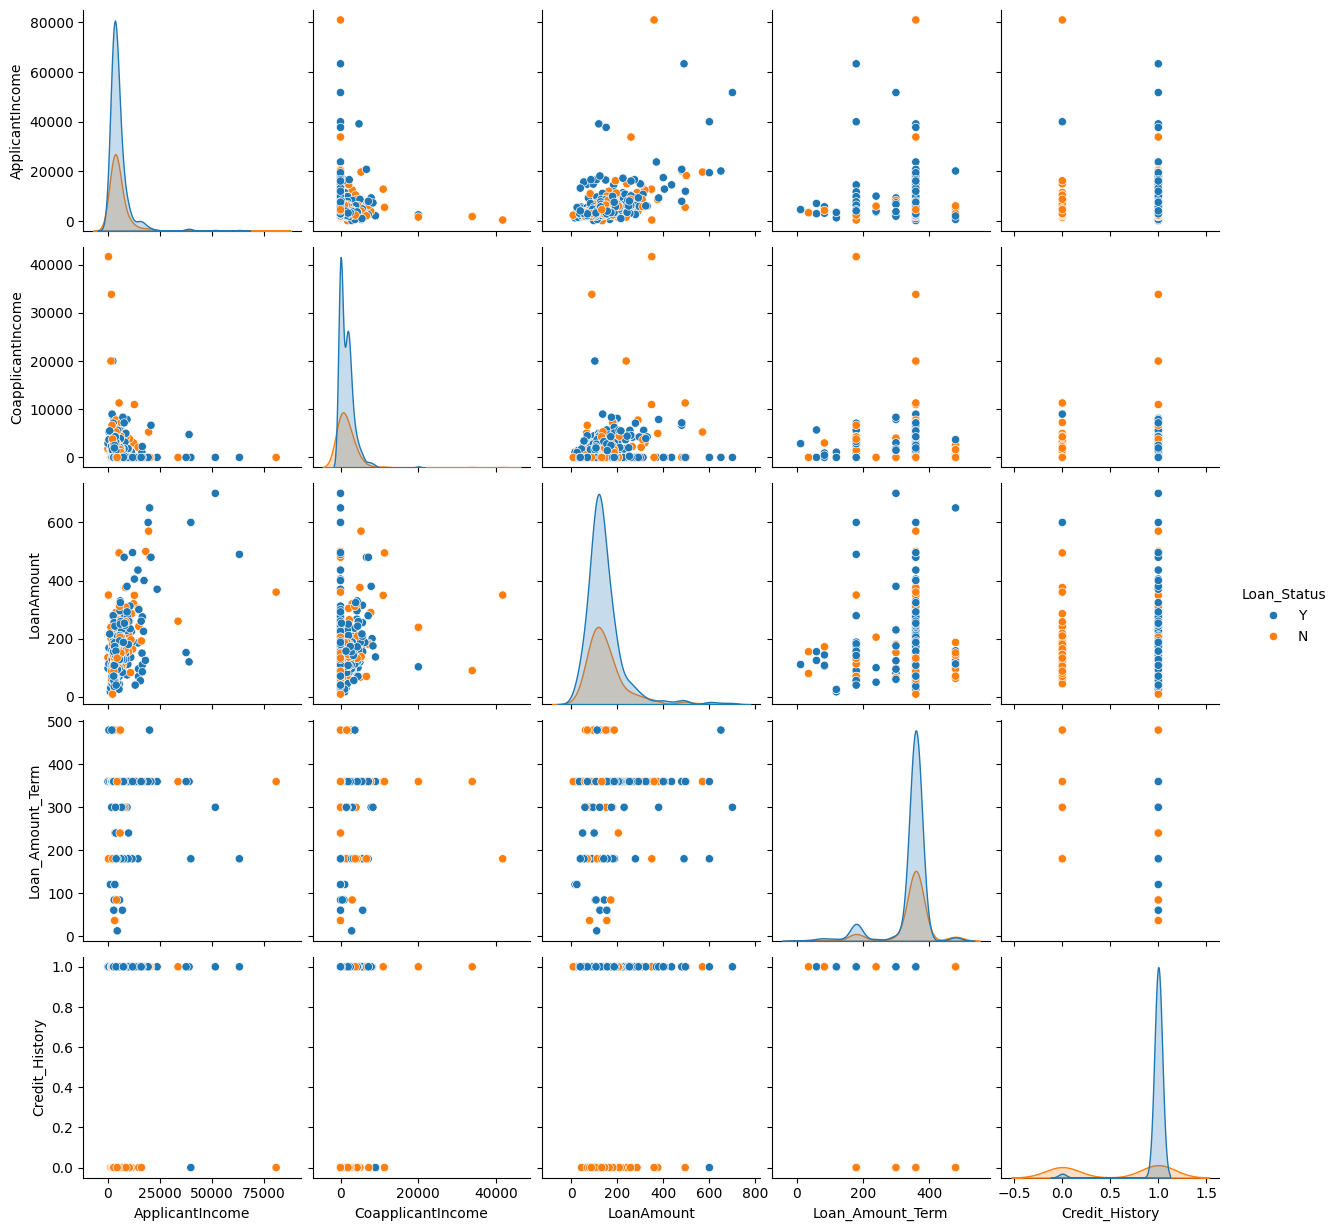

In [ ]:
#pair plot
sns.pairplot(df_train, hue='Loan_Status')
plt.show()

In [ ]:
countMale = len(df_train[df_train.Gender == 'Male'])
countFemale = len(df_train[df_train.Gender == 'Female'])
countNull = len(df_train[df_train.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df_train.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df_train.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df_train.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [ ]:
import plotly.graph_objects as go

# Calculate counts
countMale = len(df_train[df_train.Gender == 'Male'])
countFemale = len(df_train[df_train.Gender == 'Female'])
countNull = len(df_train[df_train.Gender.isnull()])

# Calculate percentages
percentMale = (countMale / len(df_train.Gender)) * 100
percentFemale = (countFemale / len(df_train.Gender)) * 100
percentNull = (countNull / len(df_train.Gender)) * 100

# Create labels and values for the pie chart
labels = ['Male', 'Female', 'Missing']
values = [percentMale, percentFemale, percentNull]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(
    title='Distribution of Gender',
    autosize=False,
    width=700,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

# Show the plot
fig.show()



In [ ]:
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [ ]:
print(df_train.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [ ]:
print(df_train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
#Usung plotly plot box plot of ApplicantIncome
fig = px.box(df_train, y="ApplicantIncome")
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker=dict(color='lightgreen'))
fig.show()

In [ ]:
df_train.ApplicantIncome.value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [ ]:
#Using plotly to counplot of variable Loan_Amount_Term
fig = px.histogram(df_train, x="Loan_Amount_Term")
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker=dict(color='lightcoral'))
fig.show()

In [ ]:
count12 = len(df_train[df_train.Loan_Amount_Term == 12.0])
count36 = len(df_train[df_train.Loan_Amount_Term == 36.0])
count60 = len(df_train[df_train.Loan_Amount_Term == 60.0])
count84 = len(df_train[df_train.Loan_Amount_Term == 84.0])
count120 = len(df_train[df_train.Loan_Amount_Term == 120.0])
count180 = len(df_train[df_train.Loan_Amount_Term == 180.0])
count240 = len(df_train[df_train.Loan_Amount_Term == 240.0])
count300 = len(df_train[df_train.Loan_Amount_Term == 300.0])
count360 = len(df_train[df_train.Loan_Amount_Term == 360.0])
count480 = len(df_train[df_train.Loan_Amount_Term == 480.0])
countNull = len(df_train[df_train.Loan_Amount_Term.isnull()])

# Calculate percentages
total_count = len(df_train.Loan_Amount_Term)
percentages = [count12, count36, count60, count84, count120, count180, count240, count300, count360, count480, countNull]
percentages = [(count / total_count) * 100 for count in percentages]

# Print using tabulate
print(tabulate([
    ['12.0', count12,  f"{percentages[0]:.2f}%"],
    ['36.0', count36, f"{percentages[1]:.2f}%"],
    ['60.0', count60, f"{percentages[2]:.2f}%"],
    ['84.0', count84, f"{percentages[3]:.2f}%"],
    ['120.0', count120, f"{percentages[4]:.2f}%"],
    ['180.0', count180, f"{percentages[5]:.2f}%"],
    ['240.0', count240, f"{percentages[6]:.2f}%"],
    ['300.0', count300, f"{percentages[7]:.2f}%"],
    ['360.0', count360, f"{percentages[8]:.2f}%"],
    ['480.0', count480, f"{percentages[9]:.2f}%"],
    ['Null', countNull, f"{percentages[10]:.2f}%"]],
    headers=['Loan_Amount_Term', 'Count', 'Percentage'],
    tablefmt="fancy_grid"))




╒════════════════════╤═════════╤══════════════╕
│ Loan_Amount_Term   │   Count │ Percentage   │
╞════════════════════╪═════════╪══════════════╡
│ 12.0               │       1 │ 0.16%        │
├────────────────────┼─────────┼──────────────┤
│ 36.0               │       2 │ 0.33%        │
├────────────────────┼─────────┼──────────────┤
│ 60.0               │       2 │ 0.33%        │
├────────────────────┼─────────┼──────────────┤
│ 84.0               │       4 │ 0.65%        │
├────────────────────┼─────────┼──────────────┤
│ 120.0              │       3 │ 0.49%        │
├────────────────────┼─────────┼──────────────┤
│ 180.0              │      44 │ 7.17%        │
├────────────────────┼─────────┼──────────────┤
│ 240.0              │       4 │ 0.65%        │
├────────────────────┼─────────┼──────────────┤
│ 300.0              │      13 │ 2.12%        │
├────────────────────┼─────────┼──────────────┤
│ 360.0              │     526 │ 85.67%       │
├────────────────────┼─────────┼────────

In [ ]:
#Using plotly to plot peichat of variable total_income_log
fig = px.pie(df_train, names='Loan_Amount_Term', title='Loan_Amount_Term')
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df_train['total_income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [ ]:
print(tabulate(df_train.head() , headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═══════════╤══════════════╤══════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╤════════════════╕
│    │ Gender   │ Married   │   Dependents │ Education    │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │   total_income │
╞════╪══════════╪═══════════╪══════════════╪══════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╪════════════════╡
│  0 │ Male     │ No        │            0 │ Graduate     │ No              │              5849 │                   0 │      146.412 │                360 │                1 │ Urban           │ Y             │           5849 │
├────┼──────────┼───────────┼──────────────┼──────────────┼─────────────────┼───────────────────

In [ ]:
# Create count plot of Marital status
fig = px.histogram(df_train, x="Married", title='Married')
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker=dict(color='lightcoral'))
fig.show()


In [ ]:
# Create count plot of Education
fig = px.histogram(df_train, x="Education", title='Education')
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker=dict(color='wheat'))
fig.show()

In [ ]:
# Create count plot of Property_Area
fig = px.histogram(df_train, x="Property_Area", title='Property_Area')
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker=dict(color='lightgreen'))
fig.show()

In [ ]:

# Create the distribution plot using Plotly Express
fig = px.histogram(df_train, x='total_income', nbins=50, title='Distribution of Total Income')

# Update layout
fig.update_layout(xaxis_title='Total Income', yaxis_title='Frequency')
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
# Show the plot
fig.show()


In [ ]:
df_train['total_income_log']=np.log(df_train['total_income'])

In [ ]:


fig = px.histogram(df_train, x='total_income_log', nbins=70, title='Distribution of total_income_log')

# Update layout
fig.update_layout(
    xaxis_title='total_income_log',
    yaxis_title='Frequency',
    autosize=False,
    width=700,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

# Change the color
fig.update_traces(marker=dict(color='skyblue'))

# Show the plot
fig.show()


In [ ]:


# Create the box plot using Plotly Express
fig = px.box(df_train, x="Education", y="ApplicantIncome")

# Update layout
fig.update_layout(
    title='Box Plot of ApplicantIncome by Education',
    xaxis_title='Education',
    yaxis_title='ApplicantIncome',
    autosize=False,
    width=700,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

# Show the plot
fig.show()


In [ ]:

import plotly.subplots as ps

# Create subplots
fig = ps.make_subplots(rows=1, cols=2)

# Add box plot to the first subplot
fig.add_trace(
    go.Box(y=df_train['LoanAmount'], boxmean='sd', name='Loan Amount Box Plot'),
    row=1, col=1
)

# Add histogram to the second subplot
fig.add_trace(
    go.Histogram(x=df_train['LoanAmount'], nbinsx=20, name='Loan Amount Histogram'),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='Loan Amount Distribution',
    xaxis=dict(title='Loan Amount'),
    yaxis=dict(title='Count'),
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have df_train DataFrame

# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.index,
                   colorscale='Viridis',  # Change the color scheme here (e.g., 'Viridis', 'RdBu', 'YlOrRd', etc.)
                   colorbar=dict(title='Correlation')
                ))

# Add annotations
annotations = []
for i, row in enumerate(corr_matrix.values):
    for j, value in enumerate(row):
        if value == 1:  # If value is 1, adjust annotation to position it to the left
            annotations.append(
                dict(
                    x=corr_matrix.columns[j],
                    y=corr_matrix.index[i],
                    text=str(round(value, 2)),  # Display rounded correlation values
                    font=dict(color='white' if abs(value) > 0.5 else 'black'),  # Color based on threshold
                    showarrow=False,
                    xshift=-20  # Shift text to the left
                )
            )
        else:
            annotations.append(
                dict(
                    x=corr_matrix.columns[j],
                    y=corr_matrix.index[i],
                    text=str(round(value, 2)),  # Display rounded correlation values
                    font=dict(color='white' if abs(value) > 0.5 else 'black'),  # Color based on threshold
                    showarrow=False
                )
            )

fig.update_layout(
    title='Correlation Heatmap',
    width=800,
    height=500,
    xaxis=dict(title='Columns'),
    yaxis=dict(title='Columns'),
    annotations=annotations
)

fig.show()


#### Data Preprosesing

Hadalling Outlier

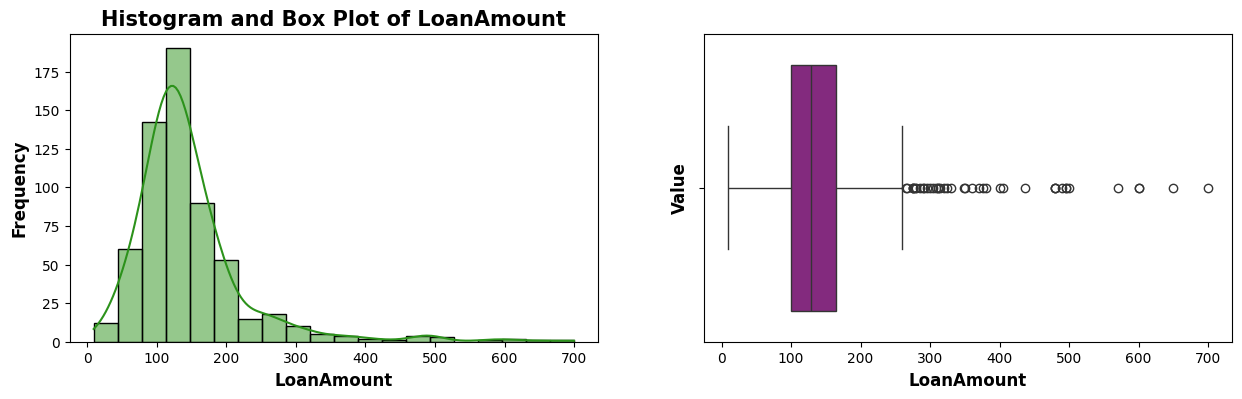

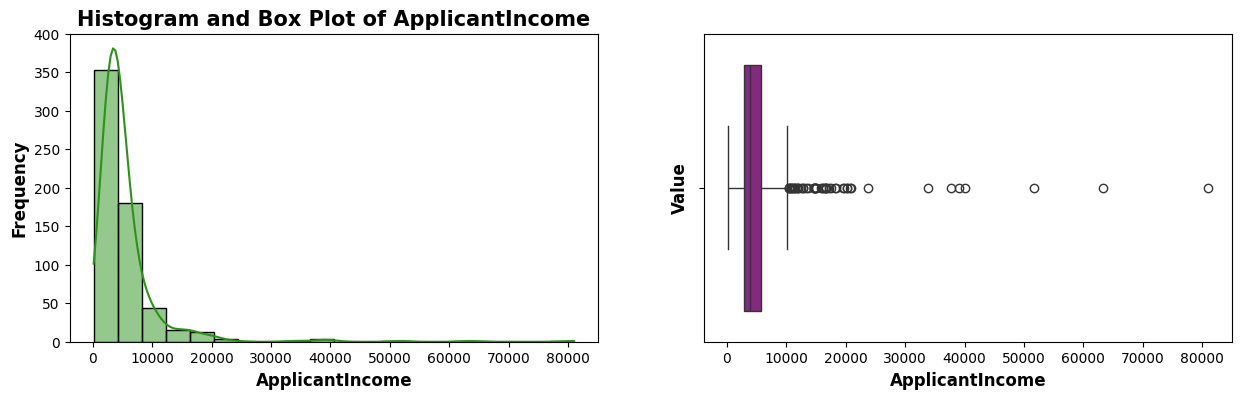

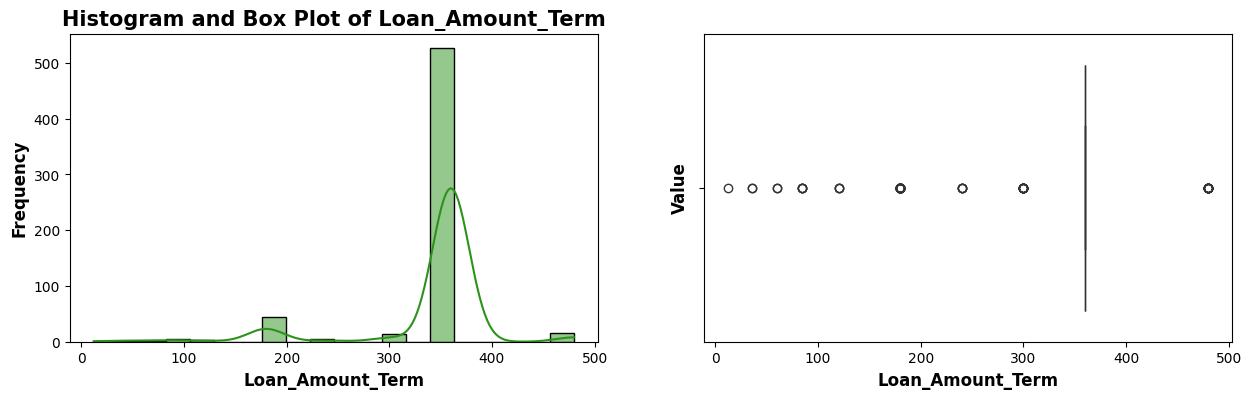

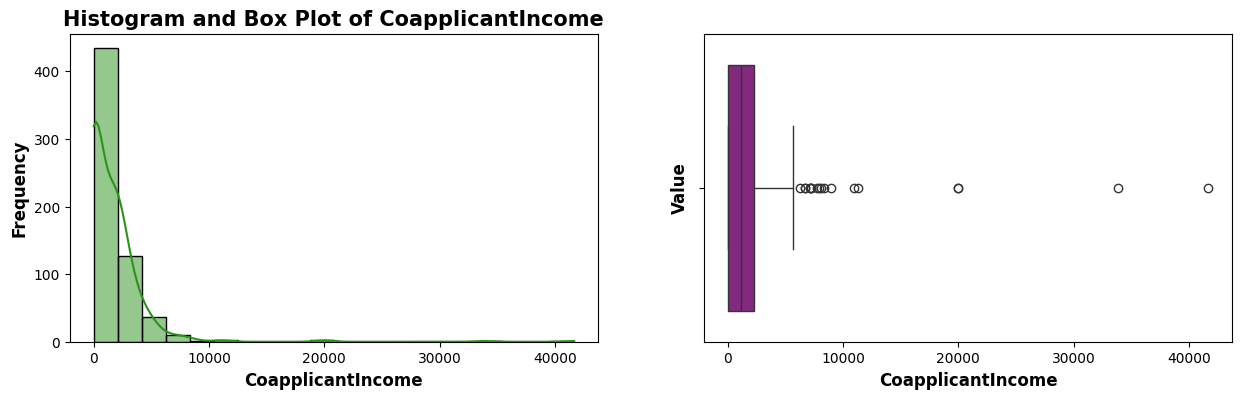

In [ ]:
#Creating a list including the columns have outliers
col_outliers = ["LoanAmount","ApplicantIncome","Loan_Amount_Term","CoapplicantIncome"]

#Creating a function of visualizing outliers using box and distribution plots
def plot_hist_box(data, column):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=data, x=column, bins=20, kde=True, ax=ax1, color='#2c921b')
    sns.boxplot(data=data, x=column, ax=ax2, color='#921b8b')
    ax1.set_title(f"Histogram and Box Plot of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()

#Showing all the columns in one action
for col in col_outliers:
    plot_hist_box(df_train, col)

In [ ]:
def remove_outliers(data, columns, k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [ ]:
columns = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome']
data = remove_outliers(df_train, columns)

In [ ]:


#plot boxplot of loanAmount, ApplicantIncome, Loan_Amount_Term, CoapplicantIncome using ploly
fig = px.box(data, y=columns)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)
fig.show()



In [ ]:
print(tabulate(data.head() , headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═══════════╤══════════════╤══════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╤════════════════╤════════════════════╕
│    │ Gender   │ Married   │   Dependents │ Education    │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │   total_income │   total_income_log │
╞════╪══════════╪═══════════╪══════════════╪══════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╪════════════════╪════════════════════╡
│  0 │ Male     │ No        │            0 │ Graduate     │ No              │              5849 │                   0 │      146.412 │                360 │                1 │ Urban           │ Y             │           5849 │            8.67403 │
├────┼──────

In [ ]:


# Create violin plot using Plotly
fig = px.violin(data, x='Loan_Status', y='ApplicantIncome', color='Loan_Status',
                title='Applicant Income vs Loan Status',
                labels={'Loan_Status': 'Loan Status', 'ApplicantIncome': 'Applicant Income'},
                violinmode='overlay')

# Update legend title
fig.update_traces(showlegend=True)
fig.update_layout(
    autosize=False,
    width=700,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_layout(legend_title_text='Loan Status', legend=dict(font=dict(size=12)))

fig.show()


In [ ]:
df_train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
import plotly.graph_objects as go

# Assuming you already have gender_loan DataFrame grouped by 'Gender' and 'Loan_Status'
gender_loan = data.groupby(['Gender', 'Loan_Status']).size().unstack()
colors = ['#ff7f0e', '#1f77b4']

fig = go.Figure()

for i, gender in enumerate(gender_loan.index):
    fig.add_trace(go.Bar(
        x=gender_loan.columns,
        y=gender_loan.loc[gender],
        name=gender,
        marker_color=colors[i]
    ))

fig.update_layout(
    title='Loan Approval based on Gender',
    xaxis=dict(title='Gender', titlefont=dict(size=12, color='black', family='Arial',),
               tickfont=dict(size=10, color='black', family='Arial')),
    yaxis=dict(title='Count', titlefont=dict(size=12, color='black', family='Arial'),
               tickfont=dict(size=10, color='black', family='Arial')),
    barmode='stack',
    width=800,
    height=500
)

fig.show()


In [ ]:
import plotly.express as px

# Assuming you already have data DataFrame

fig = px.histogram(data, x='Property_Area', color='Loan_Status', barmode='group', color_discrete_sequence=colors)

fig.update_layout(
    title='Loan Status by Property Area',
    xaxis=dict(title='Property Area', titlefont=dict(size=12, color='black', family='Arial',),
               tickfont=dict(size=10, color='black', family='Arial')),
    yaxis=dict(title='Count', titlefont=dict(size=12, color='black', family='Arial'),
               tickfont=dict(size=10, color='black', family='Arial')),
    width=800,
    height=500
)

fig.show()


In [ ]:


# Assuming you already have gender_loan DataFrame grouped by 'Married' and 'Loan_Status'

colors = ['#ff7f0e', '#1f77b4']

fig = go.Figure()

for i, married in enumerate(gender_loan.index):
    fig.add_trace(go.Bar(
        x=gender_loan.columns,
        y=gender_loan.loc[married],
        name=married,
        marker_color=colors[i]
    ))

fig.update_layout(
    title='Loan Approval based on Married',
    xaxis=dict(title='Married', titlefont=dict(size=12, color='black', family='Arial',),
               tickfont=dict(size=10, color='black', family='Arial')),
    yaxis=dict(title='Count', titlefont=dict(size=12, color='black', family='Arial'),
               tickfont=dict(size=10, color='black', family='Arial')),
    barmode='stack',
    width=800,
    height=500
)

fig.show()


In [ ]:
# Assuming you already have gender_loan DataFrame grouped by 'Self_Employed' and 'Loan_Status'

colors = ['#ff7f0e', '#1f77b4'] # New colors

fig = go.Figure()

for i, employed in enumerate(gender_loan.index):
    fig.add_trace(go.Bar(
        x=gender_loan.columns,
        y=gender_loan.loc[employed],
        name=employed,
        marker_color=colors[i]
    ))

fig.update_layout(
    title='Loan Approval based on Employment',
    xaxis=dict(title='Loan Status', titlefont=dict(size=12, color='black', family='Arial',),
               tickfont=dict(size=10, color='black', family='Arial')),
    yaxis=dict(title='Count', titlefont=dict(size=12, color='black', family='Arial'),
               tickfont=dict(size=10, color='black', family='Arial')),
    barmode='stack',
    width=800,
    height=500
)

fig.show()


In [ ]:


# Assuming you already have data DataFrame

fig = px.violin(data, x='Loan_Status', y='ApplicantIncome', color='Loan_Status', box=True,
                title='Applicant Income vs Loan Status')

fig.update_layout(
    xaxis=dict(title='Loan Status', title_font=dict(size=12, color='black', family='Arial'),
               tickfont=dict(size=10, color='black', family='Arial')),
    yaxis=dict(title='Applicant Income', title_font=dict(size=12, color='black', family='Arial'),
               tickfont=dict(size=10, color='black', family='Arial')),
    legend=dict(title='Loan Status', font=dict(size=12), title_font=dict(size=12)),
    width=800,
    height=500
)

fig.show()


Encoding Categorical

In [ ]:
data.Loan_Status = data.Loan_Status.map({'Y': 1, 'N': 0})
data.Gender = data.Gender.map({"Male" : 1 , "Female": 0})
data.Married = data.Married.map({"Yes" : 1 , "No": 0})
data.Education = data.Education.map({"Graduate" : 1 , "Not Graduate": 0})
data.Self_Employed = data.Self_Employed.map({"Yes" : 1 , "No": 0})
data.Property_Area = data.Property_Area.map({"Urban" : 1 , "Rural": 0 , "Semiurban": 2})
data.Dependents = data.Dependents.map({"0" : 0 , "1": 1 , "2": 2 , "3+": 3})
data.credit_History = data.Credit_History.map({"1.0" : 1 , "0.0": 0})


<ipython-input-43-fa8579a73e17>:8: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_log
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,5849.0,8.674026
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,3000.0,8.006368
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4941.0,8.505323
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,6000.0,8.699515


In [ ]:
#Split Credit_History to int
data['Credit_History'] = data['Credit_History'].astype(int)


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_log
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,1,1,5849.0,8.674026
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0,8.714568
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,1,1,3000.0,8.006368
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,1,1,4941.0,8.505323
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,1,1,6000.0,8.699515


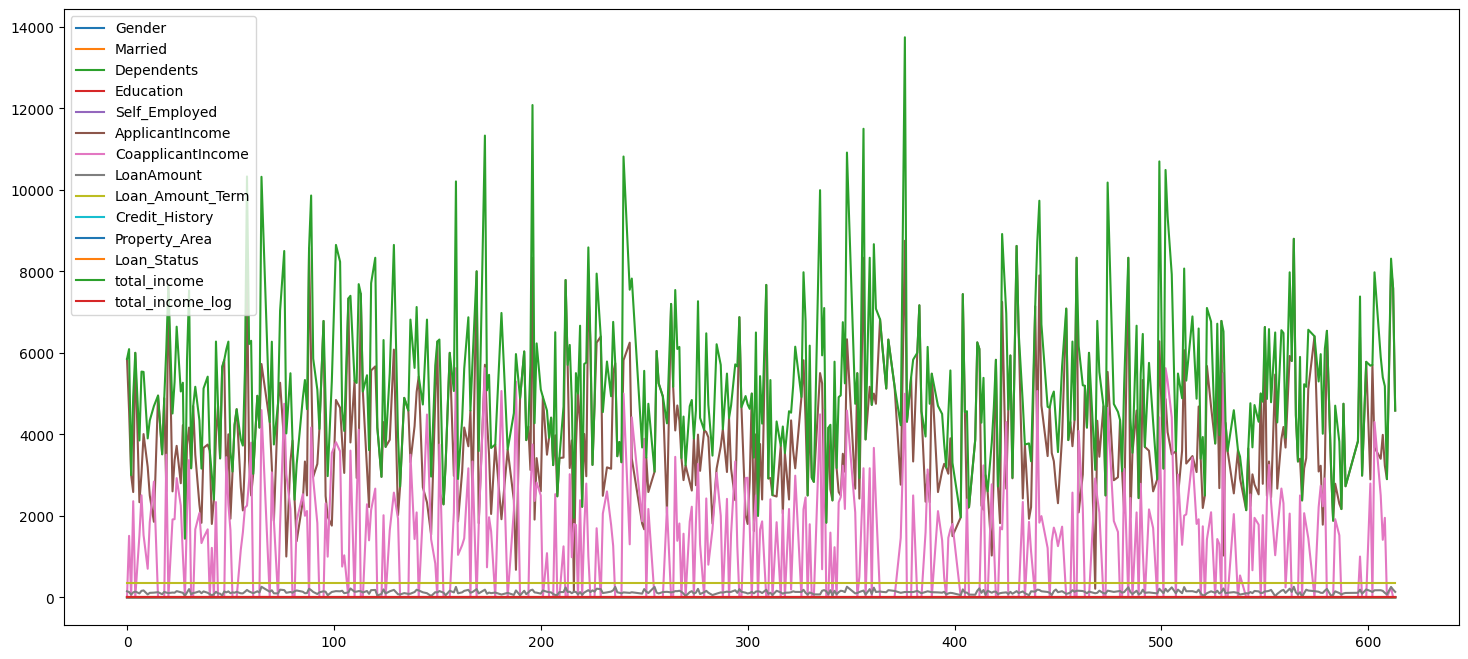

In [ ]:
data.plot(figsize=(18,8))
plt.show()

Deploy Model


In [ ]:
import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']


In [ ]:
X_selected = data[["Gender" , "Married" , "Dependents" ,"Education", "Self_Employed" ,"LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area" , "total_income_log"]]


In [ ]:
X_selected.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income_log
0,1,0,0,1,0,146.412162,360.0,1,1,8.674026
1,1,1,1,1,0,128.000000,360.0,1,0,8.714568
2,1,1,0,1,1,66.000000,360.0,1,1,8.006368
3,1,1,0,0,0,120.000000,360.0,1,1,8.505323
4,1,0,0,1,0,141.000000,360.0,1,1,8.699515


In [ ]:
X_selected, y = SMOTE().fit_resample(X_selected, y)

In [ ]:
X_selected = MinMaxScaler().fit_transform(X_selected)

In [ ]:
# Apply SMOTE oversampling

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)


Logistic Regreesion


In [ ]:


LR_classifier = LogisticRegression(solver = 'saga' , max_iter= 500 , random_state = 1)
LR_classifier.fit(X_train, y_train)
y_pred = LR_classifier.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_auc_score
LR_Accu = roc_auc_score(y_test, y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(LR_Accu * 100))


Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        69
           1       0.73      0.90      0.80        59

    accuracy                           0.80       128
   macro avg       0.81      0.80      0.80       128
weighted avg       0.81      0.80      0.80       128

[[49 20]
 [ 6 53]]
Logistic Regression Accuracy: 80.42%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Assuming you have already imported and prepared your data
# X_train, X_test, y_train, y_test

# Initialize and train the model
LR_classifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LR_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = LR_classifier.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')


Precision: 0.726027397260274
Recall: 0.8983050847457628
F1 Score: 0.803030303030303
Specificity: 0.7101449275362319
Accuracy: 0.796875


K-Nearest Neighbour

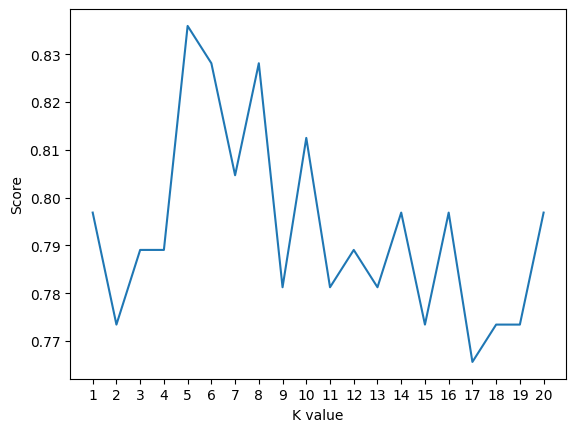

KNN Classifier Accuracy: 83.59%


In [ ]:
scooreListknn = []
for i in range(1 , 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, y_train)
    scooreListknn.append(knn_classifier.score(X_test, y_test))

plt.plot(range(1,21), scooreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
knn_classifier = max(scooreListknn)
print("KNN Classifier Accuracy: {:.2f}%".format(knn_classifier * 100))


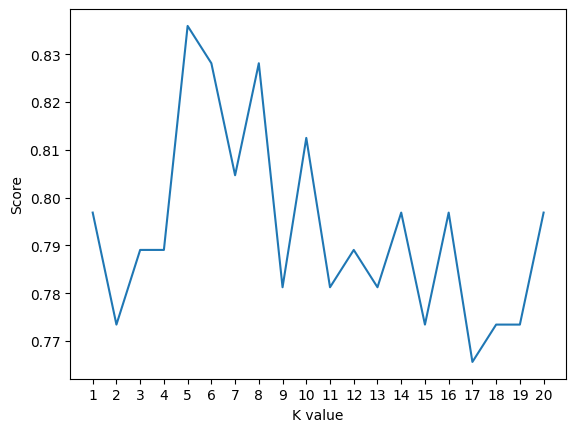

Best K value: 5
Precision: 0.7794117647058824
Recall: 0.8983050847457628
F1 Score: 0.8346456692913385
Specificity: 0.782608695652174
Accuracy: 0.8359375


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Assuming you have already imported and prepared your data
# X_train, X_test, y_train, y_test

# List to store scores for each K value
score_list_knn = []

# Train and evaluate KNN for K values from 1 to 20
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    score_list_knn.append(knn_classifier.score(X_test, y_test))

# Plot the accuracy scores for each K value
plt.plot(range(1, 21), score_list_knn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

# Find the best K value (with highest accuracy)
best_k = np.argmax(score_list_knn) + 1  # np.argmax returns the index of the highest score
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Predict on the test set using the best K value
y_pred = best_knn_classifier.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f'Best K value: {best_k}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')


Support Vector Machine (SVM)

In [ ]:
SVM_classifier = SVC(kernel = 'rbf' , max_iter= 500)
SVM_classifier.fit(X_train, y_train)
y_pred = SVM_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVM_Accu = roc_auc_score(y_test, y_pred)
print("SVM Classifier Accuracy: {:.2f}%".format(SVM_Accu * 100))


              precision    recall  f1-score   support

           0       0.90      0.65      0.76        69
           1       0.69      0.92      0.79        59

    accuracy                           0.77       128
   macro avg       0.80      0.78      0.77       128
weighted avg       0.80      0.77      0.77       128

[[45 24]
 [ 5 54]]
SVM Classifier Accuracy: 78.37%


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Initialize and train the SVM model
SVM_classifier = SVC(kernel='rbf', max_iter=500)
SVM_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = SVM_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC Score
SVM_Accu = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print("SVM Classifier ROC AUC Score: {:.2f}%".format(SVM_Accu * 100))


              precision    recall  f1-score   support

           0       0.90      0.65      0.76        69
           1       0.69      0.92      0.79        59

    accuracy                           0.77       128
   macro avg       0.80      0.78      0.77       128
weighted avg       0.80      0.77      0.77       128

[[45 24]
 [ 5 54]]
Precision: 0.6923076923076923
Recall: 0.9152542372881356
F1 Score: 0.7883211678832116
Specificity: 0.6521739130434783
Accuracy: 0.7734375
SVM Classifier ROC AUC Score: 78.37%


Gaussian NB


In [ ]:
NBc_classifier = GaussianNB()
NBc_classifier.fit(X_train, y_train)
y_pred = NBc_classifier.predict(X_test)
print("Gaussian Naive Bayes")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NBc_Accu = roc_auc_score(y_test, y_pred)
print("Gaussian Naive Bayes Accuracy: {:.2f}%".format(NBc_Accu * 100))


Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.64      0.76        69
           1       0.69      0.95      0.80        59

    accuracy                           0.78       128
   macro avg       0.81      0.79      0.78       128
weighted avg       0.82      0.78      0.78       128

[[44 25]
 [ 3 56]]
Gaussian Naive Bayes Accuracy: 79.34%


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Initialize and train the Gaussian Naive Bayes model
NBc_classifier = GaussianNB()
NBc_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = NBc_classifier.predict(X_test)

# Print classification report
print("Gaussian Naive Bayes")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC Score
NBc_Accu = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print("Gaussian Naive Bayes ROC AUC Score: {:.2f}%".format(NBc_Accu * 100))


Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.64      0.76        69
           1       0.69      0.95      0.80        59

    accuracy                           0.78       128
   macro avg       0.81      0.79      0.78       128
weighted avg       0.82      0.78      0.78       128

[[44 25]
 [ 3 56]]
Precision: 0.691358024691358
Recall: 0.9491525423728814
F1 Score: 0.7999999999999998
Specificity: 0.6376811594202898
Accuracy: 0.78125
Gaussian Naive Bayes ROC AUC Score: 79.34%


Decision Tree

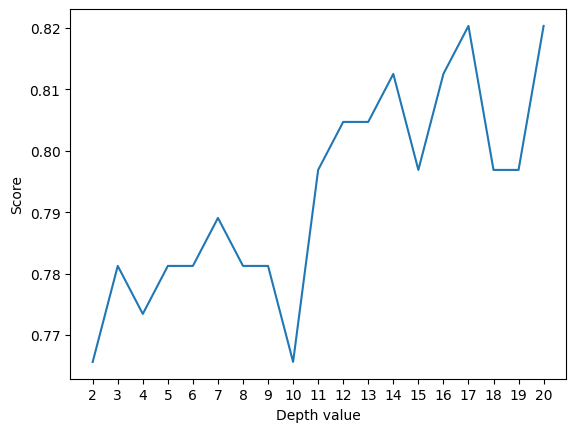

Decision Tree Classifier Accuracy: 82.03%


In [ ]:
scoreListDT = []
for i in range(2 , 21):
    DT_classifier = DecisionTreeClassifier(max_depth = i)
    DT_classifier.fit(X_train, y_train)
    scoreListDT.append(DT_classifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Depth value")
plt.ylabel("Score")
plt.show()
DT_classifier = max(scoreListDT)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(DT_classifier * 100))

Random Forest

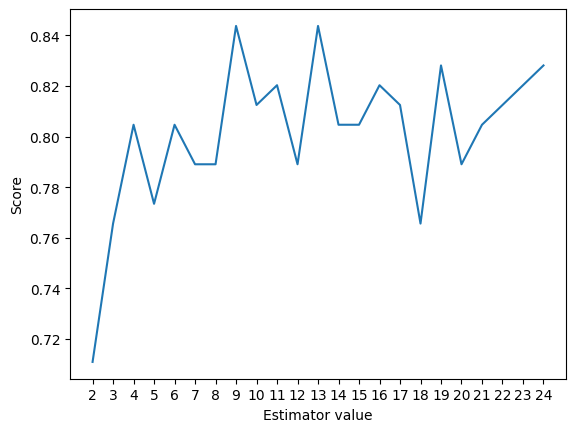

Random Forest Classifier Accuracy: 84.38%


In [ ]:
scoreListRF = []
for i in range(2 , 25):
    RF_classifier = RandomForestClassifier(n_estimators = i)
    RF_classifier.fit(X_train, y_train)
    scoreListRF.append(RF_classifier.score(X_test, y_test))

plt.plot(range(2 , 25), scoreListRF)
plt.xticks(np.arange(2 , 25 , 1))
plt.xlabel("Estimator value")
plt.ylabel("Score")
plt.show()
RF_classifier = max(scoreListRF)
print("Random Forest Classifier Accuracy: {:.2f}%".format(RF_classifier * 100))


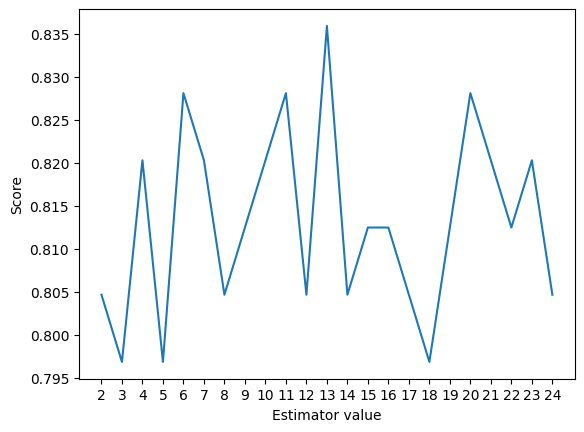

Random Forest Classifier with Best Estimator
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        69
           1       0.79      0.88      0.83        59

    accuracy                           0.84       128
   macro avg       0.84      0.84      0.84       128
weighted avg       0.84      0.84      0.84       128

[[55 14]
 [ 7 52]]
Best Estimator: 13
Precision: 0.7878787878787878
Recall: 0.8813559322033898
F1 Score: 0.832
Specificity: 0.7971014492753623
Accuracy: 0.8359375
Random Forest Classifier ROC AUC Score: 83.92%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Assuming you have already imported and prepared your data
# X_train, X_test, y_train, y_test

# List to store scores for each number of estimators
score_list_rf = []

# Train and evaluate Random Forest for estimator values from 2 to 24
for i in range(2, 25):
    RF_classifier = RandomForestClassifier(n_estimators=i, random_state=1)
    RF_classifier.fit(X_train, y_train)
    score_list_rf.append(RF_classifier.score(X_test, y_test))

# Plot the accuracy scores for each number of estimators
plt.plot(range(2, 25), score_list_rf)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Estimator value")
plt.ylabel("Score")
plt.show()

# Find the best number of estimators (with highest accuracy)
best_n_estimators = np.argmax(score_list_rf) + 2  # np.argmax returns the index of the highest score, and adding 2 because range starts at 2

# Train the best Random Forest classifier
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=1)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Print classification report
print("Random Forest Classifier with Best Estimator")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC Score
rf_roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Best Estimator: {best_n_estimators}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print("Random Forest Classifier ROC AUC Score: {:.2f}%".format(rf_roc_auc * 100))


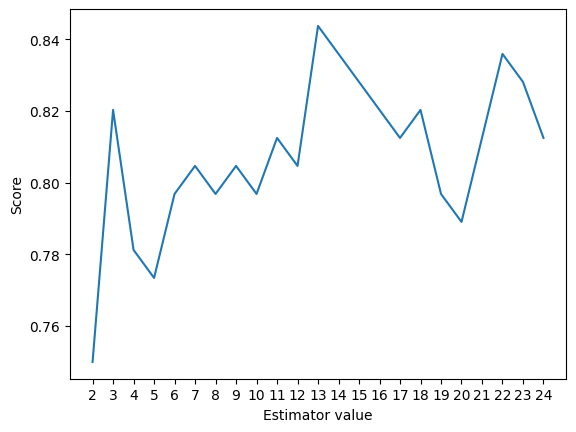

Random Forest Classifier with Best Estimator
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        69
           1       0.76      0.88      0.82        59

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.83      0.82      0.82       128

[[53 16]
 [ 7 52]]
Best Estimator: 13
Precision: 0.7647058823529411
Recall: 0.8813559322033898
F1 Score: 0.8188976377952756
Specificity: 0.7681159420289855
Accuracy: 0.8203125
Random Forest Classifier ROC AUC Score: 82.47%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Assuming you have already imported and prepared your data
# X_train, X_test, y_train, y_test

# List to store scores for each number of estimators
score_list_rf = []

# Train and evaluate Random Forest for estimator values from 2 to 24
for i in range(2, 25):
    RF_classifier = RandomForestClassifier(n_estimators=i)
    RF_classifier.fit(X_train, y_train)
    score_list_rf.append(RF_classifier.score(X_test, y_test))

# Plot the accuracy scores for each number of estimators
plt.plot(range(2, 25), score_list_rf)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Estimator value")
plt.ylabel("Score")
plt.show()

# Find the best number of estimators (with highest accuracy)
best_n_estimators = np.argmax(score_list_rf) + 2  # np.argmax returns the index of the highest score, and adding 2 because range starts at 2
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Print classification report
print("Random Forest Classifier with Best Estimator")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC Score
rf_roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Best Estimator: {best_n_estimators}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print("Random Forest Classifier ROC AUC Score: {:.2f}%".format(rf_roc_auc * 100))


Gradient Boosting

In [ ]:
paramsGB = {'n_estimators' : [100, 200, 300, 400, 500],
            'max_depth': [1 , 2 , 3 , 4 , 5],
            'subsample': [0.5 , 1],
            'max_leaf_nodes': [2 , 5 , 10 , 20 , 30 , 40 , 50]}


In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB , cv = 20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score, classification_report

# Define the parameter grid
paramsGB = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.5, 1],
    'max_leaf_nodes': [2, 5, 10, 20, 30, 40, 50]
}

# Perform Randomized Search with cross-validation
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20, random_state=1)
GB.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found: ", GB.best_params_)

# Predict on the test set using the best model
y_pred = GB.predict(X_test)

# Print classification report
print("Gradient Boosting Classifier with Best Parameters")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix to get the true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC Score
gb_roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print("Gradient Boosting Classifier ROC AUC Score: {:.2f}%".format(gb_roc_auc * 100))


Best parameters found:  {'subsample': 0.5, 'n_estimators': 100, 'max_leaf_nodes': 10, 'max_depth': 2}
Gradient Boosting Classifier with Best Parameters
              precision    recall  f1-score   support

           0       0.84      0.74      0.78        69
           1       0.73      0.83      0.78        59

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.79      0.78      0.78       128

[[51 18]
 [10 49]]
Precision: 0.7313432835820896
Recall: 0.8305084745762712
F1 Score: 0.7777777777777778
Specificity: 0.7391304347826086
Accuracy: 0.78125
Gradient Boosting Classifier ROC AUC Score: 78.48%


In [ ]:
print("Gradient Boosting Classifier")
print(GB.best_estimator_)
print(GB.best_params_)
print(GB.best_index_)
print(GB.best_score_)

Gradient Boosting Classifier
GradientBoostingClassifier(max_depth=2, max_leaf_nodes=10, subsample=0.5)
{'subsample': 0.5, 'n_estimators': 100, 'max_leaf_nodes': 10, 'max_depth': 2}
8
0.8364615384615386


In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        69
           1       0.79      0.88      0.83        59

    accuracy                           0.84       128
   macro avg       0.84      0.84      0.84       128
weighted avg       0.84      0.84      0.84       128

[[55 14]
 [ 7 52]]
Gradient Boosting accuracy: 83.59%


In [ ]:
#Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [LR_Accu, knn_classifier, SVM_Accu, NBc_Accu, DT_classifier, RF_classifier, GBAcc]
})

models.sort_values(by='Score', ascending=False)


TypeError: '>' not supported between instances of 'float' and 'DecisionTreeClassifier'

In [ ]:
#Test predict new data
new_data = [[1,0,0,1,0,146.412162,360.0,1,1,8.674026]]  # Add a missing feature
new_data = MinMaxScaler().fit_transform(new_data)
new_pred = GBclassifier.predict(new_data)
if new_pred == 1:
    print("Loan Approved")
else:
    print("Loan Rejected")

Loan Rejected


Deploy Model

In [ ]:
#Save Model and Deploy Model
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(GBclassifier, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)



0.8359375
